# Data Poisoning Attack Demo
This notebook demonstrates a simple data poisoning attack by flipping labels in the training dataset to reduce model accuracy.

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)


In [2]:
# Simulate data poisoning by flipping labels (e.g., class '1' becomes '7')
poisoned_y_train = y_train.copy()
flip_map = {1: 7, 7: 1}  # flip 1 <-> 7
for i in range(len(poisoned_y_train)):
    if poisoned_y_train[i] in flip_map:
        poisoned_y_train[i] = flip_map[poisoned_y_train[i]]


In [3]:
# Define and compile CNN model
def create_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Train clean model
clean_model = create_model()
clean_model.fit(x_train, y_train, epochs=3, validation_split=0.1)


c:\Users\Seanw\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/3
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.8925 - loss: 0.3505 - val_accuracy: 0.9828 - val_loss: 0.0672
Epoch 2/3
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.9812 - loss: 0.0623 - val_accuracy: 0.9860 - val_loss: 0.0533
Epoch 3/3
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9864 - loss: 0.0437 - val_accuracy: 0.9842 - val_loss: 0.0580


In [4]:
# Train poisoned model
poisoned_model = create_model()
poisoned_model.fit(x_train, poisoned_y_train, epochs=3, validation_split=0.1)


Epoch 1/3
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.8947 - loss: 0.3612 - val_accuracy: 0.9763 - val_loss: 0.0766
Epoch 2/3
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9815 - loss: 0.0619 - val_accuracy: 0.9840 - val_loss: 0.0609
Epoch 3/3
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9872 - loss: 0.0417 - val_accuracy: 0.9860 - val_loss: 0.0540


In [5]:
# Evaluate both models
clean_acc = clean_model.evaluate(x_test, y_test, verbose=0)[1]
poisoned_acc = poisoned_model.evaluate(x_test, y_test, verbose=0)[1]

print(f"Clean model accuracy: {clean_acc:.4f}")
print(f"Poisoned model accuracy: {poisoned_acc:.4f}")


Clean model accuracy: 0.9825
Poisoned model accuracy: 0.7695


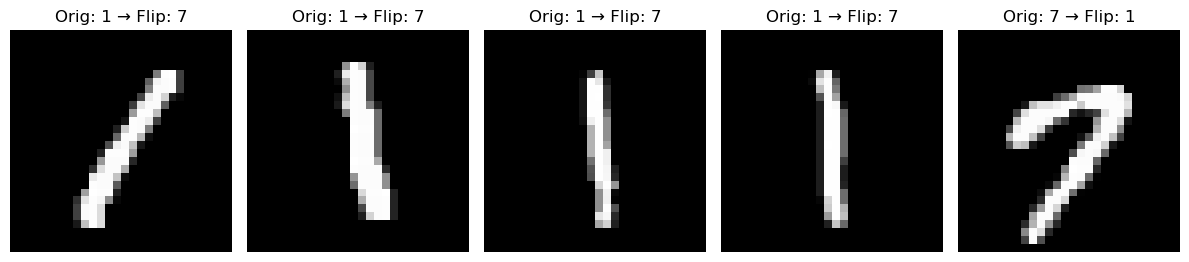

In [6]:
# Show a few flipped samples
fig, axes = plt.subplots(1, 5, figsize=(12, 3))
indices = np.where(y_train != poisoned_y_train)[0][:5]
for ax, idx in zip(axes, indices):
    ax.imshow(x_train[idx].squeeze(), cmap='gray')
    ax.set_title(f"Orig: {y_train[idx]} → Flip: {poisoned_y_train[idx]}")
    ax.axis('off')
plt.tight_layout()
plt.show()
